# Python: Introduction to Machine Learning

## Import Libraries 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder  
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm

%matplotlib inline # Display Matplotlib graphs within the Notebook (and note as separate window pop-ups)

UsageError: unrecognized arguments: # Display Matplotlib graphs within the Notebook (and note as separate window pop-ups)


## Import Data 

In [3]:
df = pd.read_csv('Data/loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

## Exploratory Data Analysis (EDA)

- EDA is an important step in the ML/Data Science pipeline 
- Gain a high-level understanding of the data and its characteristics (data types, rows, columns, missing values, etc.)  
- This step helps provide guidance on how to pre-process the data to prep it for model building 

In [5]:
# Display data about the data (nulls, data types, rows/columns, etc.)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Check for missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Display statistical summary for the data 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# List of Unique Values in all of the categorical columns 
categorical_cols = ['Gender','Married','Education','Self_Employed', 'Property_Area']

for col in categorical_cols:
    print(f'Unique Values for {col}: {df[col].unique()}')

Unique Values for Gender: ['Male' 'Female' nan]
Unique Values for Married: ['No' 'Yes' nan]
Unique Values for Education: ['Graduate' 'Not Graduate']
Unique Values for Self_Employed: ['No' 'Yes' nan]
Unique Values for Property_Area: ['Urban' 'Rural' 'Semiurban']


In [10]:
# Checking for any repeated records with regards to Loan ID
len(df.Loan_ID.unique())

614

#### Let's Summarize! 
- Loan ID is the primary key in the data - it uniquely identifies each record 
- There are 614 rows, 13 columns
- The .describe() function can be used to quickly gauge some statistics about the data 
    - In some cases it can also help identify some incorrect data (if this was a biometric dataset with heart-rate, an minimum heartrate of 0 would be a call for investigation!) 
- 7/13 columns have missing values 
- Credit History has the highest number of missing values! 

#### Key Remarks 
- Understanding the data you are working with is very important! 
- Always strive to work with Subjet Matter Experts (SMEs) to get insight into the data 
- In a real-world application, you may need to individually evaluate each column and its values to learn the context behind the data 

## Data Analysis / Data Visualization
- Investigate to find relationships and trends within the data 
- Certain features may be more prominent in determining whether the applicant's loan with be approved or not 
- Data Visualization can help reveal key information in the data 
    - Knowing which graphs to use is a key skills that comes with practice and experience! 
- A good starting point is compare different features against the label (Loan Status) to see if there are any easily distinguishable relationships

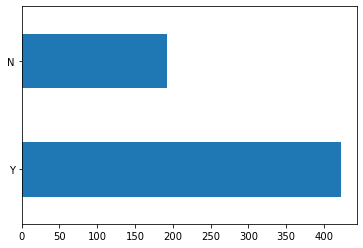

In [11]:
# Number of Approved & Not Approved (Y/N) records 
df.Loan_Status.value_counts().plot(kind='barh')

In [12]:
print(df.Loan_Status.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


#### Gender vs Approval

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


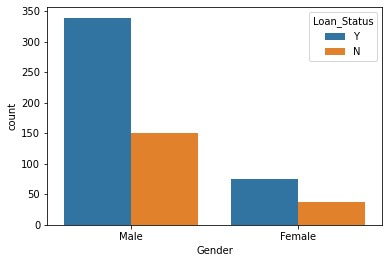

In [13]:
# Let's understand how different
print(pd.crosstab(df['Gender'],df['Loan_Status']))

sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.show()

In [14]:
print(pd.crosstab(df['Gender'], df['Loan_Status']).apply(lambda r: round(r/r.sum(),3)*100, axis=1))

Loan_Status     N     Y
Gender                 
Female       33.0  67.0
Male         30.7  69.3


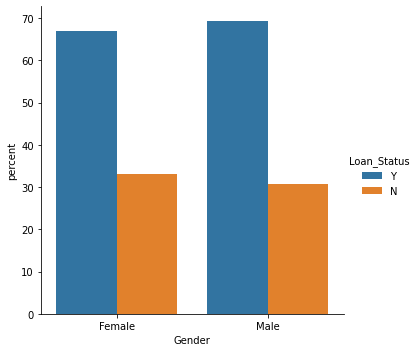

In [15]:
df_pct = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True)
df_pct = df_pct.mul(100)
df_pct = df_pct.rename('percent').reset_index()

sns.catplot(x='Gender',y='percent',hue='Loan_Status',kind='bar',data=df_pct)
plt.show()

In [16]:
# Let's write this as a method to make it easy to check the loan status against all the parameters
def column_bar(df, column):
    print(pd.crosstab(df[column],df['Loan_Status']))
    print('\nPercentage')
    print(pd.crosstab(df[column], df['Loan_Status']).apply(lambda r: round(r/r.sum(),3)*100, axis=1))
    sns.countplot(df[column],hue=df['Loan_Status'])
    plt.show()
    df_pct = df.groupby(column)['Loan_Status'].value_counts(normalize=True)
    df_pct = df_pct.mul(100)
    df_pct = df_pct.rename('percent').reset_index()

    sns.catplot(x=column,y='percent',hue='Loan_Status',kind='bar',data=df_pct)
    plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Percentage
Loan_Status     N     Y
Gender                 
Female       33.0  67.0
Male         30.7  69.3


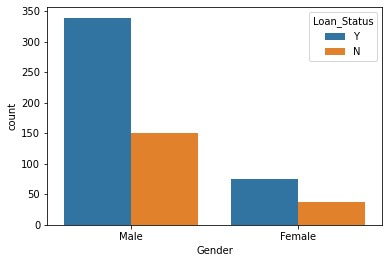

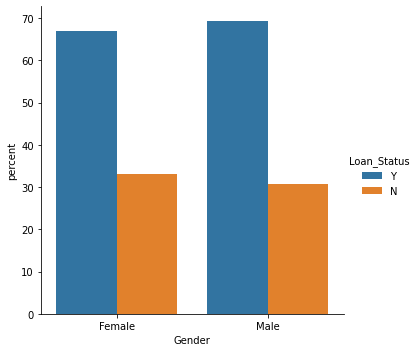

In [19]:
# Test the function 
column_bar(df, 'Gender')

#### All Categorical Features vs Approval

In [20]:
#Select the data we want to test
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Percentage
Loan_Status     N     Y
Gender                 
Female       33.0  67.0
Male         30.7  69.3


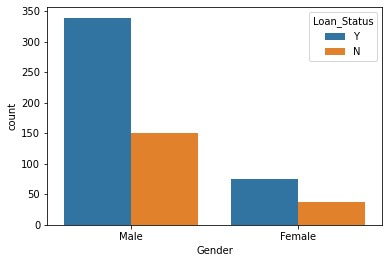

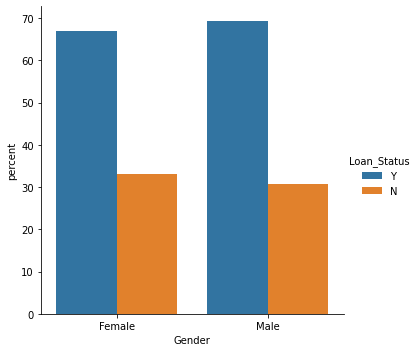

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

Percentage
Loan_Status     N     Y
Married                
No           37.1  62.9
Yes          28.4  71.6


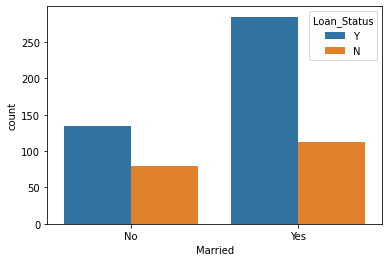

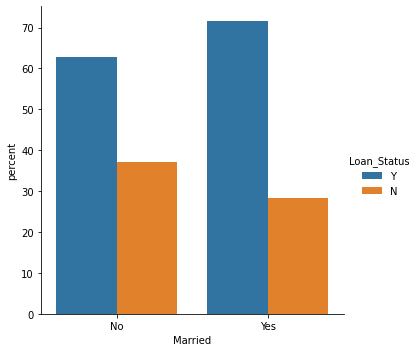

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

Percentage
Loan_Status     N     Y
Dependents             
0            31.0  69.0
1            35.3  64.7
2            24.8  75.2
3+           35.3  64.7


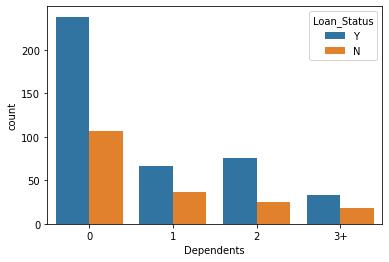

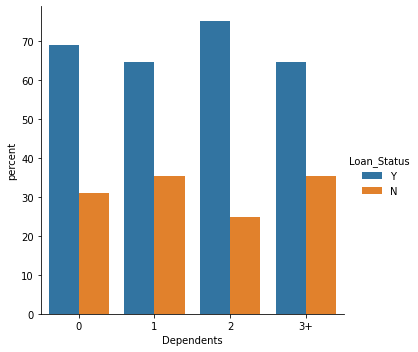

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

Percentage
Loan_Status      N     Y
Education               
Graduate      29.2  70.8
Not Graduate  38.8  61.2


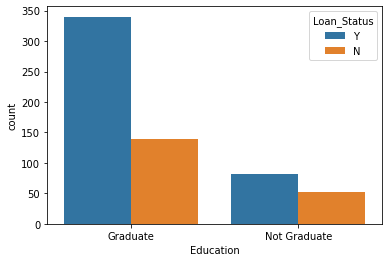

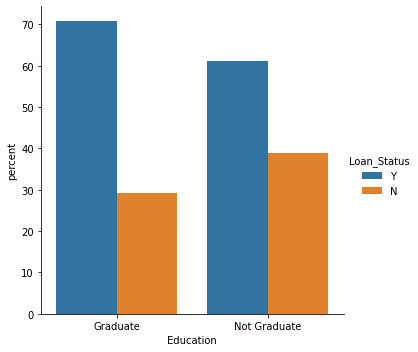

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56

Percentage
Loan_Status       N     Y
Self_Employed            
No             31.4  68.6
Yes            31.7  68.3


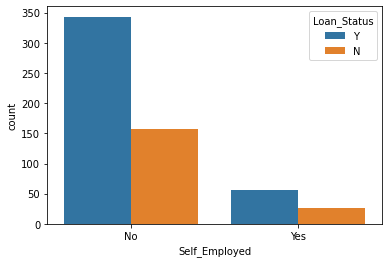

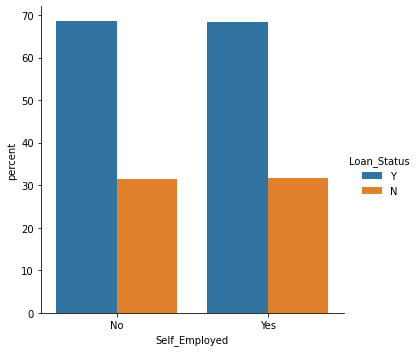

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133

Percentage
Loan_Status       N     Y
Property_Area            
Rural          38.5  61.5
Semiurban      23.2  76.8
Urban          34.2  65.8


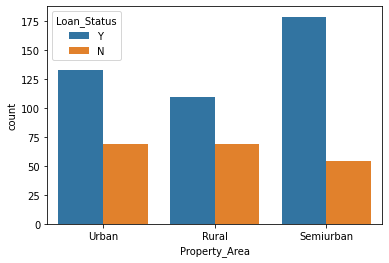

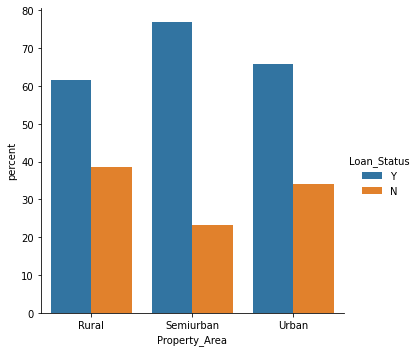

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378

Percentage
Loan_Status        N     Y
Credit_History            
0.0             92.1   7.9
1.0             20.4  79.6


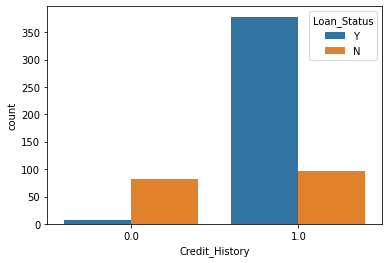

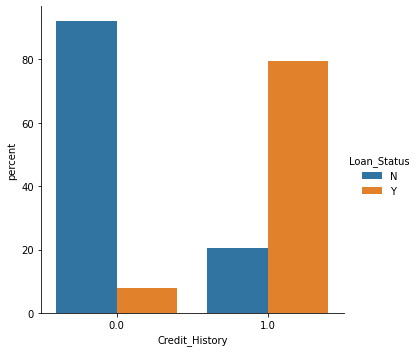

In [21]:
for column in columns:
    column_bar(df,column)

#### Continuous Features 

In [22]:
# Check Continuous variables
def column_scatter(df,column):
    plt.scatter(df[column], df['Loan_Status']);
    plt.title(column)
    plt.show()

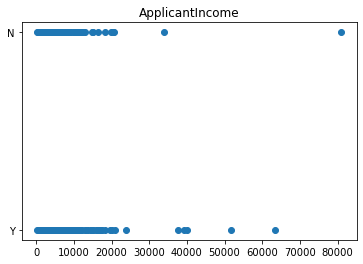

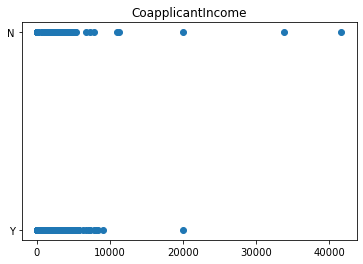

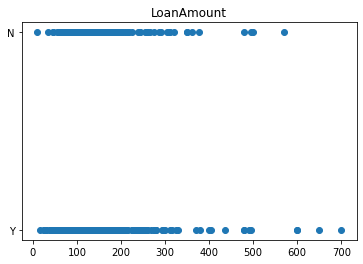

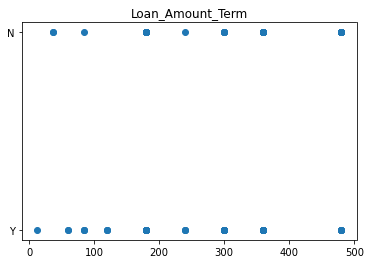

In [23]:
# ApplicantIncome
# CoapplicantIncome
# LoanAmount
# Loan_Amount_Term

scatter_columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for column in scatter_columns:
    column_scatter(df,column)

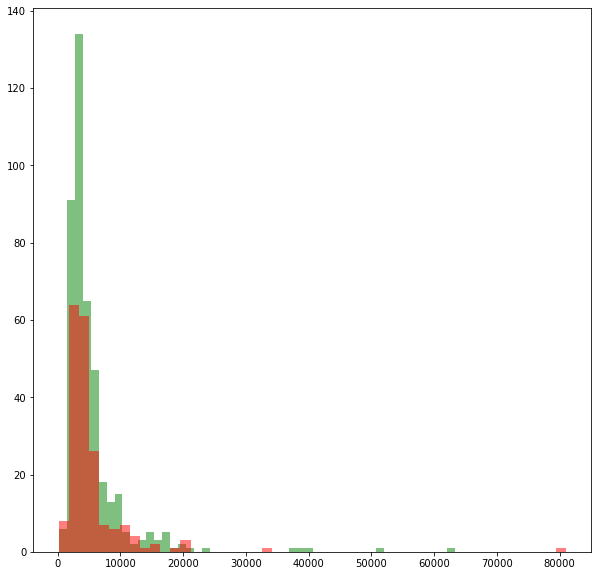

In [24]:
# Histogram -----> Review, should we keep this? 

y_loan = df.loc[df.Loan_Status == 'Y']
n_loan = df.loc[df.Loan_Status == 'N']

kwargs = dict(alpha=0.5, bins=50)

plt.figure(figsize=(10,10))
plt.hist(y_loan['ApplicantIncome'], **kwargs, color='g')
plt.hist(n_loan['ApplicantIncome'], **kwargs, color='r')
plt.show()

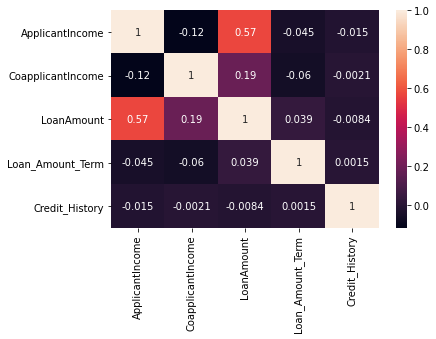

In [25]:
# Let's look at correlation next
sns.heatmap(df.corr(),annot=True)

## Model Development

### Data Preparation

In [7]:
# remove all null values
df.dropna(inplace=True)

In [8]:
#Confirm it worked
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#Check for duplicate entries
df.duplicated().any()

False

In [10]:
#What's the shape of the new data?
df.shape

(480, 13)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [22]:
# We need to replace string data (Y,N), with numbers
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
non_numerical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for column in non_numerical:
    print(le.fit(df[column]).classes_)
    df[column] = le.fit_transform(df[column])

['Female' 'Male']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Semiurban' 'Urban']


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


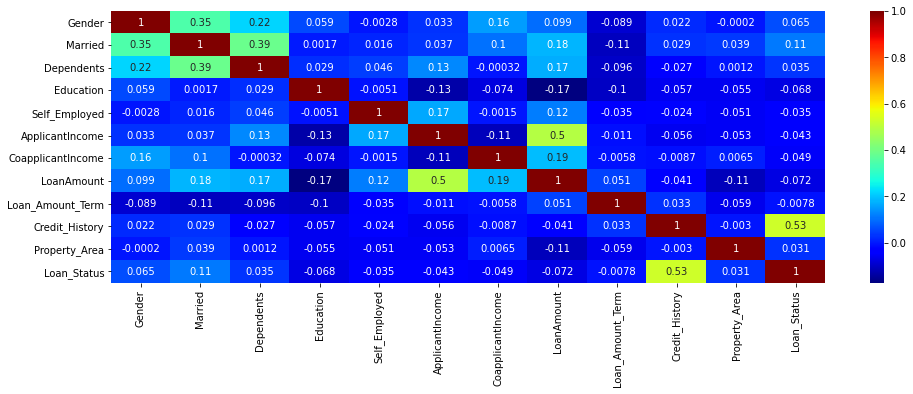

In [25]:
# Heatmap Again
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True,cmap='jet')

### Model Creation

In [26]:
# Obvious parameter to drop
df.drop('Loan_ID', axis=1, inplace=True)

In [27]:
# Separate data into target and features
Y = df['Loan_Status'].to_frame()
X = df.drop(columns=['Loan_Status'])

In [28]:
validation_size = 0.25
seed = 12
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,test_size=validation_size,random_state=seed)

In [29]:
print(X_train.shape)
print(Y_validation.shape)

(360, 11)
(120, 1)


### Model Evaluation

## Hyperparamter Tuning

## Model Testing

In [32]:
# Load Test Data
test_df = pd.read_csv('Data/loan_train.csv')

## Considerations 
 - Test out different algorithms -> Random Forest for Regression 
 - Iterate over the feature selection process 
 - Feature Engineering: Develop your own features from the available data 
